In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [23]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

dew  humidity  pressure  temperature     timestamp  volt
1728112041  26.27     74.26   1009.42        31.40  1.728112e+09  4.12
1728112101  26.30     74.22   1009.44        31.45  1.728112e+09  4.11
1728112161  26.42     74.72   1009.45        31.45  1.728112e+09  4.12
1728112223  26.35     74.35   1009.49        31.47  1.728112e+09  4.12
1728112282  26.12     73.77   1009.36        31.37  1.728112e+09  4.12
1728112341  26.25     74.15   1009.36        31.41  1.728112e+09  4.11
1728112401  26.29     74.12   1009.39        31.46  1.728112e+09  4.11
1728112461  26.30     74.26   1009.37        31.44  1.728112e+09  4.12
1728112521  26.27     74.23   1009.34        31.41  1.728113e+09  4.12
1728112581  26.40     74.50   1009.37        31.48  1.728113e+09  4.12

In [24]:
cuacaT.describe()

dew       humidity       pressure    temperature  \
count  417079.000000  417080.000000  417080.000000  417080.000000   
mean       25.014708      85.670042    1011.435411      27.825019   
std         1.508422      11.142998       2.788898       3.276646   
min        17.670000       0.000000       0.000000       0.020000   
25%        24.150000      76.890000    1010.200000      25.410000   
50%        25.090000      90.070000    1011.480000      26.930000   
75%        26.060000      94.740000    1012.770000      30.300000   
max        29.700000      99.580000    1016.530000      41.120000   

          timestamp           volt  
count  4.170800e+05  417080.000000  
mean   1.715269e+09       4.091045  
std    7.903783e+06       0.030951  
min    0.000000e+00       0.000000  
25%    1.708747e+09       4.070000  
50%    1.715368e+09       4.090000  
75%    1.721702e+09       4.120000  
max    1.728113e+09       4.170000

In [25]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1728112041  26.27     74.26   1009.42        31.40  1728112041  4.12
1728112101  26.30     74.22   1009.44        31.45  1728112101  4.11
1728112161  26.42     74.72   1009.45        31.45  1728112161  4.12
1728112223  26.35     74.35   1009.49        31.47  1728112223  4.12
1728112282  26.12     73.77   1009.36        31.37  1728112282  4.12
1728112341  26.25     74.15   1009.36        31.41  1728112341  4.11
1728112401  26.29     74.12   1009.39        31.46  1728112401  4.11
1728112461  26.30     74.26   1009.37        31.44  1728112461  4.12
1728112521  26.27     74.23   1009.34        31.41  1728112521  4.12
1728112581  26.40     74.50   1009.37        31.48  1728112581  4.12

In [26]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

# Mengubah format waktu menjadi '%Y-%m-%d %H:%M:%S' dalam WIB
cuacaT['timestamp'] = cuacaT['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Menampilkan 10 data terakhir
cuacaT.tail(10)

dew  humidity  pressure  temperature            timestamp  volt
1728112041  26.27     74.26   1009.42        31.40  2024-10-05 14:07:21  4.12
1728112101  26.30     74.22   1009.44        31.45  2024-10-05 14:08:21  4.11
1728112161  26.42     74.72   1009.45        31.45  2024-10-05 14:09:21  4.12
1728112223  26.35     74.35   1009.49        31.47  2024-10-05 14:10:23  4.12
1728112282  26.12     73.77   1009.36        31.37  2024-10-05 14:11:22  4.12
1728112341  26.25     74.15   1009.36        31.41  2024-10-05 14:12:21  4.11
1728112401  26.29     74.12   1009.39        31.46  2024-10-05 14:13:21  4.11
1728112461  26.30     74.26   1009.37        31.44  2024-10-05 14:14:21  4.12
1728112521  26.27     74.23   1009.34        31.41  2024-10-05 14:15:21  4.12
1728112581  26.40     74.50   1009.37        31.48  2024-10-05 14:16:21  4.12

In [27]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [29]:
datacuaca = (lambda: _deepnote_execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
datacuaca

dew  humidity  pressure  temperature           timestamp  volt
0      25.02     93.06   1011.65        26.23 2024-09-05 00:19:55  4.07
1      25.01     93.04   1011.63        26.23 2024-09-05 00:20:55  4.07
2      25.01     93.03   1011.66        26.23 2024-09-05 00:21:55  4.07
3      25.03     93.06   1011.66        26.24 2024-09-05 00:22:55  4.07
4      24.99     92.97   1011.65        26.22 2024-09-05 00:23:55  4.07
...      ...       ...       ...          ...                 ...   ...
43195  26.25     74.15   1009.36        31.41 2024-10-05 14:12:21  4.11
43196  26.29     74.12   1009.39        31.46 2024-10-05 14:13:21  4.11
43197  26.30     74.26   1009.37        31.44 2024-10-05 14:14:21  4.12
43198  26.27     74.23   1009.34        31.41 2024-10-05 14:15:21  4.12
43199  26.40     74.50   1009.37        31.48 2024-10-05 14:16:21  4.12

[43200 rows x 6 columns]

In [23]:
(lambda: DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [32]:
datacuaca

dew  humidity  pressure  temperature                 timestamp  volt  \
0      25.02     93.06   1011.65        26.23 2024-09-05 07:19:55+07:00  4.07   
1      25.01     93.04   1011.63        26.23 2024-09-05 07:20:55+07:00  4.07   
2      25.01     93.03   1011.66        26.23 2024-09-05 07:21:55+07:00  4.07   
3      25.03     93.06   1011.66        26.24 2024-09-05 07:22:55+07:00  4.07   
4      24.99     92.97   1011.65        26.22 2024-09-05 07:23:55+07:00  4.07   
...      ...       ...       ...          ...                       ...   ...   
43195  26.25     74.15   1009.36        31.41 2024-10-05 21:12:21+07:00  4.11   
43196  26.29     74.12   1009.39        31.46 2024-10-05 21:13:21+07:00  4.11   
43197  26.30     74.26   1009.37        31.44 2024-10-05 21:14:21+07:00  4.12   
43198  26.27     74.23   1009.34        31.41 2024-10-05 21:15:21+07:00  4.12   
43199  26.40     74.50   1009.37        31.48 2024-10-05 21:16:21+07:00  4.12   

       day  hour  
0        5     7  
1        5     7  
2        5     7  
3        5     7  
4        5     7  
...    ...   ...  
43195    5    21  
43196    5    21  
43197    5    21  
43198    5    21  
43199    5    21  

[43200 rows x 8 columns]

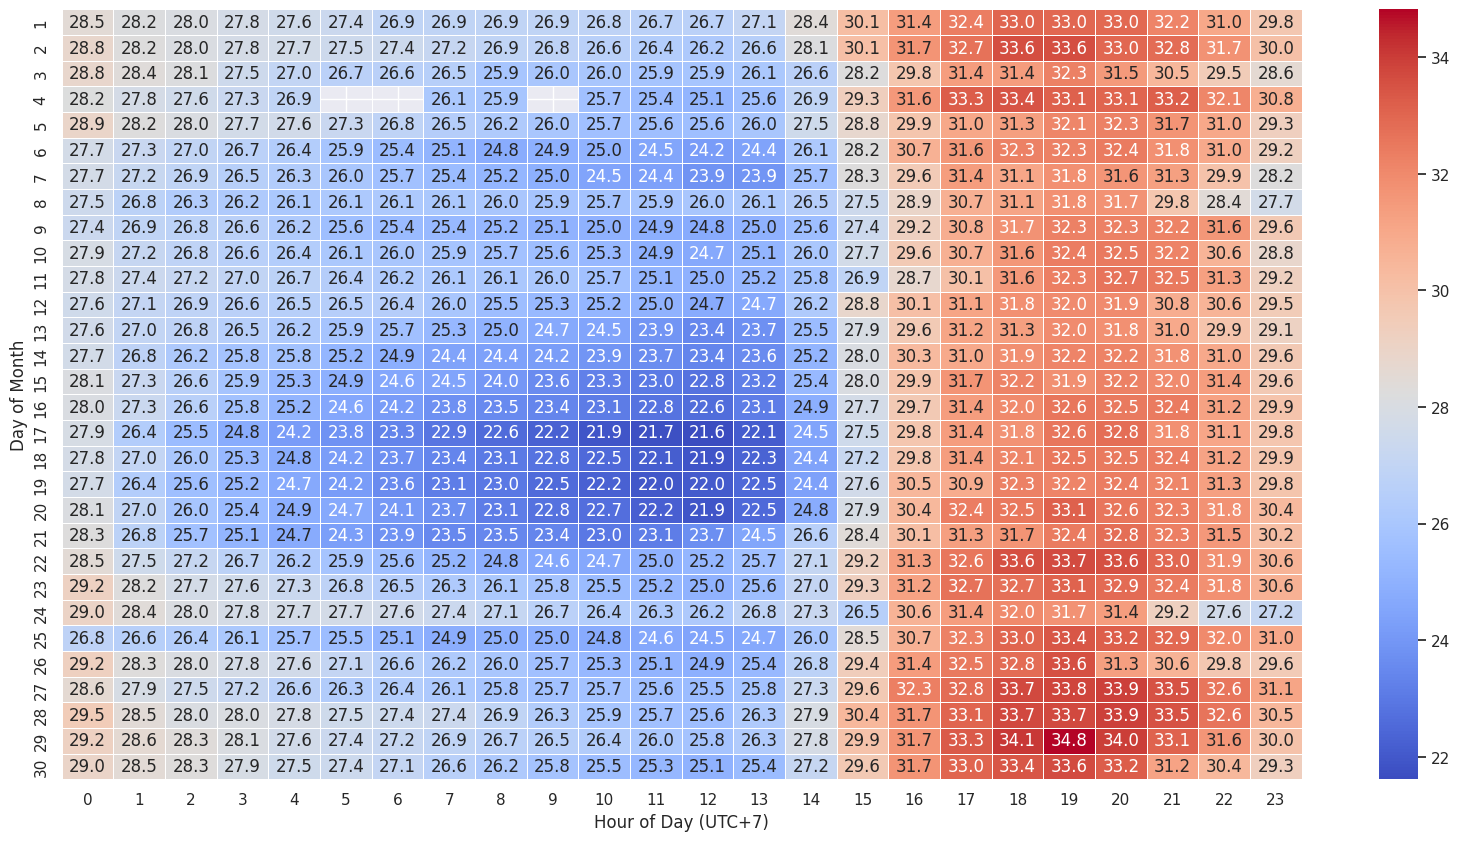

In [31]:
# Pastikan kolom 'timestamp' sudah diubah ke format datetime jika belum
# datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Menambahkan zona waktu UTC (jika belum ada) dan mengonversi ke UTC+7 (GMT+7)
datacuaca['timestamp'] = datacuaca['timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['hour'] = datacuaca['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>